# Minst 手寫辨識-CNN


## packages
+ Mnist :手寫數字資料集
+ matplotlib.pyplot :畫圖函式
+ np_utils :
+ 


In [23]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense


In [2]:
# 讀取Minst資料集
(train_feature, train_label), \
(test_feature, test_label) = mnist.load_data()

In [65]:
# 顯示資料圖片和
def show_images_labels_predictions(images,labels,
                                 predictions,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25 :
        num = 25
    for i in range(num):
        # 以subplot方式印出不同資料圖片
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[start_id], cmap='binary')

        # 有預測結果的資料，在標題顯示結果
        if len(predictions) > 0 :
            title = 'AI = ' + str(predictions[i])
            # 顯示正確或錯誤
            title += '(o)' if predictions[i]==labels[i] else '(x)' 
            title += '\n'+'label = ' + str(labels[i])
        # 沒有預測結果的資料，只在標題顯示真實數值
        else:
            title = 'label = ' + str(labels[i])
        
        # XY軸刻度不顯示
        ax.set_xticks([]);ax.set_yticks([])
        ax.set_title(title,fontsize=12)
        start_id += 1
    plt.show

In [44]:
# 訓練繪圖工具
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

## Preprocessing

In [6]:
# reshape
train_feature_vector = train_feature.reshape(len(train_feature),28,28,1).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),28,28,1).astype('float32')

print(train_feature_vector.shape)
print(test_feature_vector.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
# normalize feature
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255
print("train:",np.min(train_feature_normalize),"~",np.max(train_feature_normalize))
print("test:",np.min(test_feature_normalize),"~",np.max(test_feature_normalize))

train: 0.0 ~ 1.0
test: 0.0 ~ 1.0


In [22]:
# make label One-hot Encoding code
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

## Modeling

In [36]:
def build_CNN_model():
    model = Sequential()
    # Convolution layer 1
    model.add(Conv2D(filters=10,
                     kernel_size=(3,3),
                     padding='same',
                     input_shape=(28,28,1),
                     activation='relu'))
    # pool layer 1
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Con layer 2
    model.add(Conv2D(filters=10,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'))
    # pool layer 2
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.20))
    # flat layer
    model.add(Flatten())
    
    model.add(Dense(units=10,activation='softmax'))
    model.summary()
    return model
              
    

In [46]:
model = build_CNN_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 10)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 490)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4910      
Total para

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [48]:
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,
                         validation_split = 0.2,
                         epochs = 10, batch_size = 200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.8255 - acc: 0.7612 - val_loss: 0.2353 - val_acc: 0.9367
Epoch 2/10
 - 4s - loss: 0.2501 - acc: 0.9256 - val_loss: 0.1560 - val_acc: 0.9576
Epoch 3/10
 - 4s - loss: 0.1844 - acc: 0.9447 - val_loss: 0.1245 - val_acc: 0.9645
Epoch 4/10
 - 4s - loss: 0.1534 - acc: 0.9539 - val_loss: 0.1082 - val_acc: 0.9688
Epoch 5/10
 - 4s - loss: 0.1332 - acc: 0.9582 - val_loss: 0.0949 - val_acc: 0.9736
Epoch 6/10
 - 4s - loss: 0.1182 - acc: 0.9631 - val_loss: 0.0904 - val_acc: 0.9738
Epoch 7/10
 - 4s - loss: 0.1089 - acc: 0.9671 - val_loss: 0.0811 - val_acc: 0.9773
Epoch 8/10
 - 4s - loss: 0.1015 - acc: 0.9682 - val_loss: 0.0750 - val_acc: 0.9787
Epoch 9/10
 - 4s - loss: 0.0937 - acc: 0.9705 - val_loss: 0.0722 - val_acc: 0.9788
Epoch 10/10
 - 4s - loss: 0.0883 - acc: 0.9732 - val_loss: 0.0661 - val_acc: 0.9813


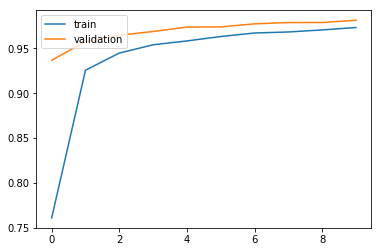

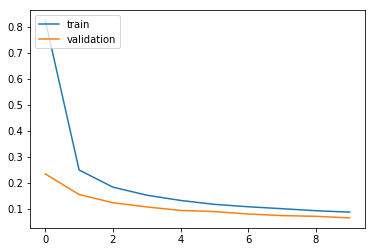

10000/10000 [==============================] - 1s 122us/step

 準確率： 0.9827


In [49]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')
scores = model.evaluate(test_feature_normalize,test_label_onehot)
print('\n 準確率：',scores[1])

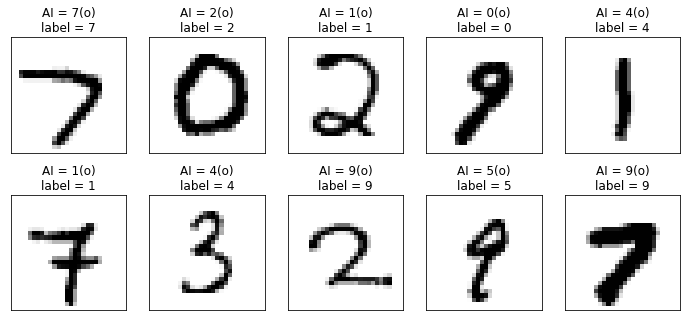

In [66]:
prediction = model.predict_classes(test_feature_normalize)
show_images_labels_predictions(test_feature,test_label,prediction,70)